In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.shape,deliveries.shape

((756, 18), (51631, 21))

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [5]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172,in that way

totalrun_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
437,216,2,139.0
438,217,1,160.0
439,217,2,162.0
440,218,1,111.0


In [7]:
# capturing only the first innings,as we will be predicting for the second innnigs

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,match_id,inning,total_runs
0,1,1,208.0
2,2,1,185.0
4,3,1,184.0
6,4,1,164.0
8,5,1,158.0
...,...,...,...
432,214,1,185.0
434,215,1,155.0
436,216,1,139.0
438,217,1,161.0


In [8]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
'''
Merging the total first innings score df with the matches df,
where left side merging is done on "id" column of the matches
and right side merging is done on "match_id" column of the totalrun_df

'''

match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,IPL-2010,Bangalore,08-04-2010,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN,214,185.0
214,215,IPL-2010,Chandigarh,09-04-2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN,215,155.0
215,216,IPL-2010,Nagpur,10-04-2010,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Deccan Chargers,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,216,139.0
216,217,IPL-2010,Bangalore,10-04-2010,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN,217,161.0


In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [11]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [12]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')


# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [13]:
# will consider only frequently occuring teams,
# which are mentioned in the teams list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [14]:
match_df.shape

(190, 20)

In [15]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159.0


In [ ]:
# checking the matches which resulted in dl method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [16]:
# ignoring the rows which were DL method

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id,city,winner and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208.0
4,5,Bangalore,Royal Challengers Bangalore,158.0
6,7,Mumbai,Mumbai Indians,179.0
7,8,Indore,Kings XI Punjab,149.0
9,10,Mumbai,Mumbai Indians,159.0
...,...,...,...,...
213,214,Bangalore,Deccan Chargers,185.0
214,215,Chandigarh,Kings XI Punjab,155.0
215,216,Nagpur,Deccan Chargers,139.0
216,217,Bangalore,Royal Challengers Bangalore,161.0


In [17]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [18]:
# merging matchdf with delevieries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [19]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
# considering the 2nd innings 

delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [21]:
delivery_df.shape

(21166, 24)

In [22]:
'''
So by observation we can observe that in the matchdf we had taken
firstinnings total runs,right and in the second case,that is in the 
delivery dataframe we considered second inning runs,as our main aim
is to find the probability of either teams to win or loose,we need 
current runs and runrate,so for current runs,we can apply groupby
on matchid and take the cummulative sum wrt total_runs_y,now,basically
totalruns was present in matchdf as well as deliveries_df,but as we merged
both the dataframes,it resulted in total_runs_x,and total_runs_y,
so total_runs_x is the first innings runs and total_runs_y are the second
innings runs,ball by ball,by applying cummulative sum,this becomes 
current score


total_runs_y gives the run scored after each ball,so in the second innings,
we want to get the total second innings runs,so we will groupby match id
and will apply the cummulative sum


'''

# current score of particular match

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0


In [23]:
# runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0


In [24]:
'''
if one ball is played,then balls left = 120-1 = 119........(1)
if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6
now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)

'''

# balls left


delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0,119
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,118
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,117
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0,116
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,87.0,25.0,32
43994,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,88.0,24.0,31
43995,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0,30
43996,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0,29


In [25]:
list(delivery_df['player_dismissed'].unique())[:2]

[nan, 'Mandeep Singh']

In [26]:

# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()


array([0, 1])

In [27]:
# wickets fallen 

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

delivery_df['wickets'] = 10-wickets

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,207.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,205.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,201.0,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,1.0,1.0,0,NaN,NaN,87.0,25.0,32,8
43994,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,1.0,0.0,1.0,0,NaN,NaN,88.0,24.0,31,8
43995,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0,NaN,NaN,88.0,24.0,30,8
43996,218,Delhi,Kings XI Punjab,112.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0,NaN,NaN,88.0,24.0,29,8


In [29]:
# current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])


delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0,NaN,NaN,1.0,207.0,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,207.0,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,207.0,117,10,2.0,10.615385


In [30]:
def resultfun(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0

In [31]:
delivery_df['result'] = delivery_df.apply(resultfun,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1.0,207.0,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3.0,205.0,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7.0,201.0,115,10,8.4,10.486957,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


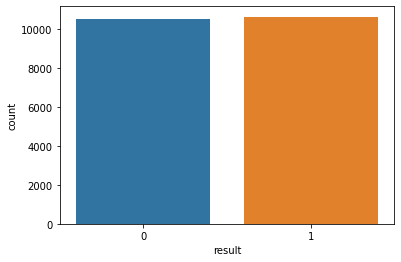

In [32]:
sn.countplot(delivery_df['result'])

In [33]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957,0


In [34]:
final_df.shape

(21166, 10)

In [35]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       1
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    1
req_run_rate    3
result          0
dtype: int64

In [36]:
# dropping of null values


final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [37]:
final_df = final_df[final_df['balls_left'] != 0]

In [38]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((16876, 9), (4219, 9))

In [40]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [42]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder

cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [43]:
# creating the pipeline


pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [44]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8511495615074662


In [45]:
pipe.predict_proba(X_test)[10]

array([0.2926945, 0.7073055])

In [46]:
# Selecting Random Forest Classifier

pipe2 = Pipeline(steps=[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

1.0


In [47]:
# oth index is loose prob and 1st index is win prob

pipe2.predict_proba(X_test)[10]

array([0.03, 0.97])

In [48]:
'''
I will go with Logistic Regression because i need to 
showcase the probability right,even though Random Forest is 
giving much accurate result,but RandomForest is being baised
at one side,as you can observe the prob of winning for 10th sample
is shown as 98% and 2% loose prob,this is kind of tooo strong or may
be sometimes unrealistic,so its better to use a model which gives equal 
justice towards both side,as we also don't know which team will outperform 
and win the game!

'''

"\nI will go with Logistic Regression because i need to \nshowcase the probability right,even though Random Forest is \ngiving much accurate result,but RandomForest is being baised\nat one side,as you can observe the prob of winning for 10th sample\nis shown as 98% and 2% loose prob,this is kind of tooo strong or may\nbe sometimes unrealistic,so its better to use a model which gives equal \njustice towards both side,as we also don't know which team will outperform \nand win the game!\n\n"

In [49]:
# saving the logistic regression model

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))